In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import classification_report
from itertools import chain
import os

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from time import time
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [3]:
path = "C:/USERS/OPTIMUSPRIME/Desktop/Studia/Magisterka/Faints-Prediction/"
BP_filename = "BP.csv"
HR_filename = "HR.csv"

train_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/training_set.txt", header=None).values.tolist()]
test_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/test_set.txt", header=None).values.tolist()]
validation_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/validation_set.txt", header=None).values.tolist()]
all_indices = train_indices + test_indices + validation_indices

In [4]:
BP_data = pd.read_csv(path + "DATA/" + BP_filename, low_memory=False)[all_indices]
HR_data = pd.read_csv(path + "DATA/" + HR_filename, low_memory=False)[all_indices]
labels = {col: BP_data[col].iloc[0] for col in BP_data}

BP_max_value = BP_data.iloc[1:].astype(np.float32).max().max()
BP_min_value = BP_data.iloc[1:].astype(np.float32).min().min()
HR_max_value = HR_data.iloc[1:].astype(np.float32).max().max()
HR_min_value = HR_data.iloc[1:].astype(np.float32).min().min()

BP_scaler = MinMaxScaler().fit(np.array([BP_min_value, BP_max_value]).reshape(-1,1))
HR_scaler = MinMaxScaler().fit(np.array([HR_min_value, HR_max_value]).reshape(-1,1))

BP_data_scaled = BP_data.iloc[1:].astype(np.float32).copy()
BP_data_scaled[all_indices] = BP_scaler.transform(BP_data_scaled[all_indices])


HR_data_scaled = HR_data.iloc[1:].astype(np.float32).copy()
HR_data_scaled[all_indices] = HR_scaler.transform(HR_data_scaled[all_indices])

In [5]:
# SMOOTHING
BP_data_scaled_averaged = BP_data_scaled.rolling(64).mean()
HR_data_scaled_averaged = HR_data_scaled.rolling(64).mean()

# Label Validation Samples

In [21]:
indexes = ['375', '1', '92', '110', '158', '286', '295', '393', '460', '501', '606', '658', '675'] #375 is the longest, that's why it is in the beginning
# indexes = ['375', '393']

In [7]:
def label_func(index, start, end, color):
    for i in range(start, end):
        BP_HR_validation_labels[index][i] = color

BP_HR_validation_labels = dict()
BP_validation = dict()
HR_validation = dict()
for index in indexes:
    BPx = np.array(BP_data_scaled_averaged[index])
    HRx = np.array(HR_data_scaled_averaged[index])
    BPx = BPx[~np.isnan(BPx)]
    HRx = HRx[~np.isnan(HRx)]
    BPx = BPx[:-(BPx.shape[0] % 32)]
    HRx = HRx[:-(HRx.shape[0] % 32)]
    BPxs = np.array(np.array_split(BPx, int(len(BPx)/32)))
    HRxs = np.array(np.array_split(HRx, int(len(HRx)/32)))
    BP_HR_validation_labels[index] = np.array(['g']*len(BPxs))
    BP_validation[index] = BPxs
    HR_validation[index]= HRxs

In [8]:
index = '1'
label_func('1', 80, 81, 'r')
label_func('1', 81, 107, 'r')
label_func('1', 107, 108, 'r')
index = '92' 
label_func('92', 41, 49, 'r')
label_func('92', 142, 143, 'r')
label_func('92', 143, 154, 'r')
index = '110' 
label_func('110', 119, 120, 'r')
label_func('110', 120, 123, 'r')
index = '158' 
label_func('158', 25, 29, 'r')
label_func('158', 115, 116, 'r')
label_func('158', 116, 122, 'r')
label_func('158', 122, 123, 'r')
index = '286' 
label_func('286', 63, 65, 'r')
label_func('286', 65, 67, 'r')
label_func('286', 123, 124, 'r')
label_func('286', 124, 129, 'r')
label_func('286', 129, 131, 'r')
label_func('286', 131, 134, 'r')
index = '295' 
label_func('295', 131, 134, 'r')
label_func('295', 134, 144, 'r')
index = '375'
label_func('375', 40, 47, 'r')
label_func('375', 129, 133, 'r')
label_func('375', 133, 141, 'r')
label_func('375', 141, 144, 'r')
label_func('375', 162, 167, 'r')
index = '393' 
label_func('393', 32, 36, 'r')
label_func('393', 36, 37, 'r')
index = '460' 
label_func('460', 50, 58, 'r')
label_func('460', 58, 59, 'r')
index = '501'
label_func('501', 119, 120, 'r')
label_func('501', 120, 124, 'r')
label_func('501', 124, 125, 'r')
index = '606'
label_func('606', 60, 61, 'r')
label_func('606', 61, 70, 'r')
label_func('606', 70, 72, 'r')
index = '658', 
label_func('658', 36, 53, 'r')
label_func('658', 53, 55, 'r')
index ='675', 
label_func('675', 82, 101, 'r')
label_func('675', 101, 104, 'r')

# Auxiliary Functions

In [14]:
BEST_MODEL_GRID_SEARCH_RESULTS_FILE_NAME = "LOWESS_best_model_thresholds_grid_search.tsv" 

def sample_timeseries(x):
    x = np.array(x)
    x = x[~np.isnan(x)]
    if x.shape[0] % 32 != 0:
        x = x[:-(x.shape[0] % 32)]
    return np.array(np.array_split(x, int(len(x)/32)))


N_SAMPLES_MEMORY = 5
BP_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)
HR_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)
BP_HR_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)

def zero_accumulators():
    global BP_SEVERITY_ACC, HR_SEVERITY_ACC, BP_HR_SEVERITY_ACC
    BP_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)
    HR_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)
    BP_HR_SEVERITY_ACC = np.zeros(N_SAMPLES_MEMORY)
    
def classifier(y_pred, a, b):
    global BP_SEVERITY_ACC, HR_SEVERITY_ACC, BP_HR_SEVERITY_ACC
    BP_anomaly_score = y_pred[-1][0]
    HR_anomaly_score = y_pred[-1][1]
    HR_SEVERITY_ACC = np.append(HR_SEVERITY_ACC, HR_anomaly_score)
    BP_SEVERITY_ACC = np.append(BP_SEVERITY_ACC, BP_anomaly_score)
    BP_HR_SEVERITY_ACC = np.append(BP_HR_SEVERITY_ACC, HR_anomaly_score + BP_anomaly_score)
    if HR_anomaly_score > a or BP_anomaly_score > a or HR_anomaly_score + BP_anomaly_score > a or np.mean(HR_SEVERITY_ACC[-5:]) > b or np.mean(BP_SEVERITY_ACC[-5:]) > b or np.mean(BP_HR_SEVERITY_ACC[-5:]) > b:
        return 'r'
    else:
        return 'g'    

def write_to_file(path, header, *args):
    with open(path, 'a') as file:
        if os.stat(path).st_size == 0:
            file.write(header)
        text = str()
        for item in args:
            text += str(item) + '\t'
        file.write('\n' + text)

def count_samples(timeseries):
    n_of_not_nans = np.count_nonzero(~np.isnan(timeseries))
    return int(n_of_not_nans/32)

def calculate_metrics(direct_threshold, average_threshold, labels_true, labels_pred, write_file):
    class_report = classification_report(labels_true, labels_pred, output_dict=True)
    acc = round(class_report['accuracy'], 4)
    red_f1 = round(class_report['r']['f1-score'], 4)
    red_precision = round(class_report['r']['precision'], 4)
    red_recall = round(class_report['r']['recall'], 4)
    green_f1 = round(class_report['g']['f1-score'], 4)
    green_precision = round(class_report['g']['precision'], 4)
    green_recall = round(class_report['g']['recall'], 4)
    if write_file:
        write_to_file(BEST_MODEL_GRID_SEARCH_RESULTS_FILE_NAME, 
                      "Direct Threshold\tAveraged Threshold\tAccuracy\tRed F1\tRed Precision\tRed Recall\tGreen F1\tGreen Precision\tGreen Recall",
                      direct_threshold,
                      average_threshold,
                      acc,
                      red_f1,
                      red_precision,
                      red_recall,
                      green_f1,
                      green_precision,
                      green_recall) 
    return red_f1

def evaluate_model(y_pred, direct_threshold, average_threshold, write_file):
    start = time()
    labels_pred = np.array([])
    
    for i in indexes:
        zero_accumulators()
        n_of_samples_in_timeseries = count_samples(BP_data_scaled_averaged[i])
        for j in range(n_of_samples_in_timeseries):   
            severity = classifier(y_pred[i][:j+1], direct_threshold, average_threshold)
            labels_pred = np.append(labels_pred, severity)
    labels_true = np.array(list(chain(*BP_HR_validation_labels.values())), dtype=str)  
    example_metric = calculate_metrics(direct_threshold, average_threshold, labels_true, labels_pred, write_file)
    
#     print(f"Red F1: {example_metric:.4f}, DT: {direct_threshold:.3f}, AT: {average_threshold:.3f}, time:{(time() - start):.2f}s")

# Parameters optimization

In [15]:
direct_thresholds = np.array(range(20, 202, 2)) / 1000
average_thresholds = np.array(range(20, 202, 2)) / 1000
print(direct_thresholds)

[0.02  0.022 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042
 0.044 0.046 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066
 0.068 0.07  0.072 0.074 0.076 0.078 0.08  0.082 0.084 0.086 0.088 0.09
 0.092 0.094 0.096 0.098 0.1   0.102 0.104 0.106 0.108 0.11  0.112 0.114
 0.116 0.118 0.12  0.122 0.124 0.126 0.128 0.13  0.132 0.134 0.136 0.138
 0.14  0.142 0.144 0.146 0.148 0.15  0.152 0.154 0.156 0.158 0.16  0.162
 0.164 0.166 0.168 0.17  0.172 0.174 0.176 0.178 0.18  0.182 0.184 0.186
 0.188 0.19  0.192 0.194 0.196 0.198 0.2  ]


In [16]:
def detrend(observed):
    indexes = [x for x in range(len(observed))]
    trend = lowess(observed, indexes, frac=0.6, delta=0.1 * len(observed), return_sorted=False)
    return observed - trend

def calc_predicted_values(BP_data, HR_data):
    y_pred = dict()
    for i in indexes:
        y_pred_sample = []
        HR_sampled = sample_timeseries(HR_data[i])
        BP_sampled = sample_timeseries(BP_data[i]) 
        n_of_samples_in_timeseries = len(BP_sampled)
        for j in range(n_of_samples_in_timeseries):   
            HR_resid = detrend(HR_sampled[:j+1].flatten())
            BP_resid = detrend(BP_sampled[:j+1].flatten())
            HR_anomaly_score = np.abs(np.mean(HR_resid[-32:]))
            BP_anomaly_score = np.abs(np.mean(BP_resid[-32:]))
            y_pred_sample.append([BP_anomaly_score, HR_anomaly_score])
        y_pred[i] = y_pred_sample   
    return y_pred

def grid_search(direct_thresholds, average_thresholds, write_file=False):
    print("Calculating predictions ...")
    y_pred = calc_predicted_values(BP_data_scaled_averaged, HR_data_scaled_averaged)
    print("Calculating predictions done.")
    for direct_threshold in direct_thresholds:
        for average_threshold in average_thresholds:
            evaluate_model(y_pred, direct_threshold, average_threshold, write_file)

# grid_search(direct_thresholds, average_thresholds, True)

# Plotting metrics

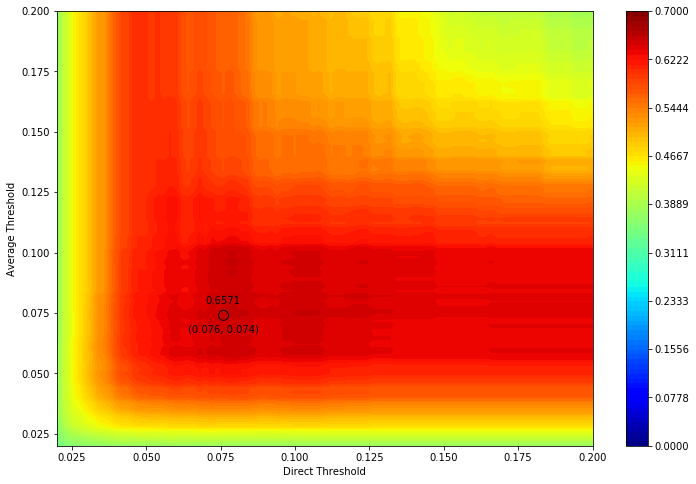

In [17]:
def plot_metric(AA, BB, CC):
    def f(AA, BB):
        C = np.zeros((len(AA), len(BB)))
        for i in range(len(AA)):
            for j in range(len(BB)):
                C[i, j] = CC[(AA[i], BB[j])]
        return C    
    A, B = np.meshgrid(AA, BB)
    C = f(AA, BB)
        
    max_val = np.max(C)
    x, y = np.where(C == max_val)
    max_val_x = A[x[0], x[0]]
    max_val_y = B[y[0], y[0]]
    
    fig, ax = plt.subplots(figsize=(12,8))
    levels = np.linspace(0, 0.7, 91)
    plt.contourf(A, B, C, levels=levels, cmap='jet')
    ax.set_xlabel('Average Threshold')
    ax.set_ylabel('Direct Threshold')
    plt.colorbar()
    ax.scatter([max_val_y], [max_val_x], marker='o', facecolors='none', s=100, edgecolors='black')
    ax.annotate(max_val, (max_val_y - 0.006, max_val_x + 0.005))
    ax.annotate(f'({max_val_y:.3f}, {max_val_x:.3f})', (max_val_y - 0.0118, max_val_x - 0.007))
    plt.savefig('LOWESS_heatmap_F1.png')
    
def load_metric_and_plot(file_path, metric_name):
    metrics = pd.read_csv(file_path, delimiter='\t', index_col=False)
    direct_thresholds = sorted(metrics['Direct Threshold'].unique())
    average_thresholds = sorted(metrics['Averaged Threshold'].unique())
    selected_metric = dict()
    for index, row in metrics.iterrows():
        selected_metric[(row['Direct Threshold'], row['Averaged Threshold'])] = row[metric_name]
    plot_metric(direct_thresholds, average_thresholds, selected_metric)

load_metric_and_plot(BEST_MODEL_GRID_SEARCH_RESULTS_FILE_NAME, "Red F1")

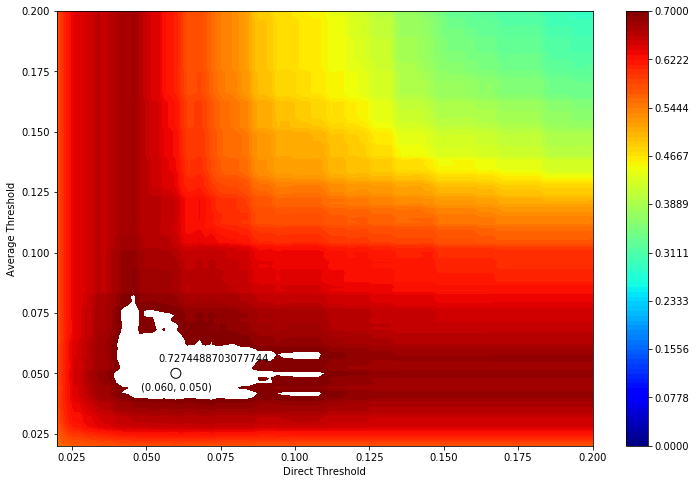

In [18]:
load_metric_and_plot(BEST_MODEL_GRID_SEARCH_RESULTS_FILE_NAME, "Red F2R1P")

# Save Timeseries Classification

In [22]:
y_pred = calc_predicted_values(BP_data_scaled_averaged, HR_data_scaled_averaged)

grid_search_results = pd.read_csv(BEST_MODEL_GRID_SEARCH_RESULTS_FILE_NAME, delimiter='\t', index_col=False)
best_parameters = grid_search_results.loc[grid_search_results['Red F1'] == max(grid_search_results['Red F1'])]
direct_threshold = best_parameters['Direct Threshold'].iloc[0]
average_threshold = best_parameters['Averaged Threshold'].iloc[0]
print(f"Chosen direct threshold: {direct_threshold}\nChosen average threshold: {average_threshold}")

predicted_labels = pd.DataFrame()
counter = 0
for i in indexes:
    counter = counter + 1
    labels = [] 
    zero_accumulators()
    HR = sample_timeseries(HR_data_scaled_averaged[i])
    BP = sample_timeseries(BP_data_scaled_averaged[i])
    n_of_samples = len(BP)
    for j in range(n_of_samples):
        labels.append(classifier(y_pred[i][:j+1], direct_threshold, average_threshold))
    predicted_labels[i] = pd.Series(labels)
    
predicted_labels.to_csv('best_model_best_params_predicted_labels.tsv', sep='\t')

Chosen direct threshold: 0.07400000000000001
Chosen average threshold: 0.076


In [22]:
ind = '375'
HR_sampled = sample_timeseries(HR_data_scaled_averaged[ind])
BP_sampled = sample_timeseries(BP_data_scaled_averaged[ind])

(0, 1)

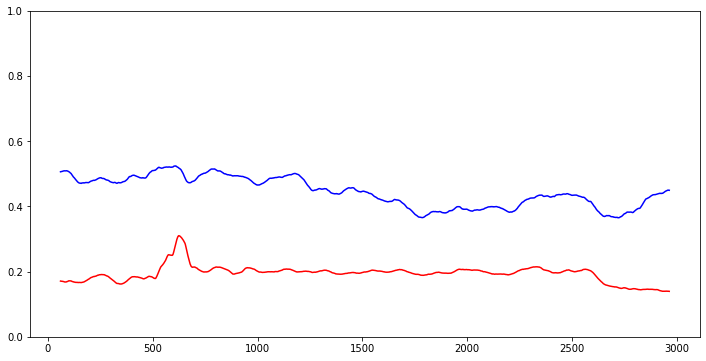

In [23]:
plt.figure(figsize=(12,6))
plt.plot(HR_data_scaled_averaged[ind], 'r')
plt.plot(BP_data_scaled_averaged[ind], 'b')
plt.ylim(0,1)

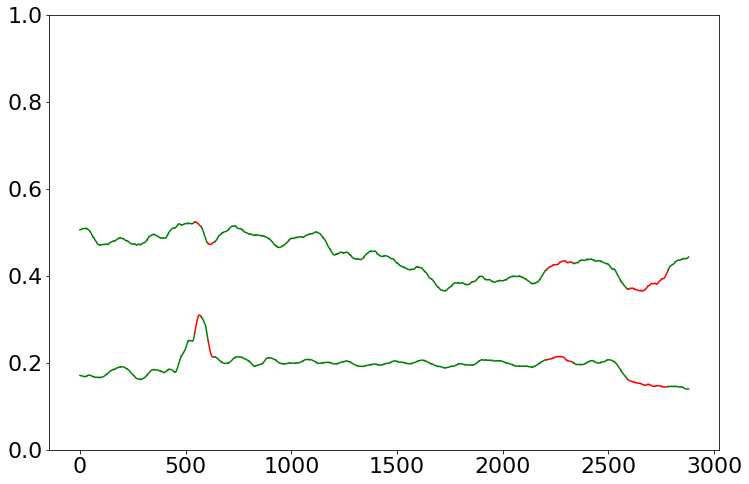

In [47]:
plot_classified_timeseries_without_labels(BP_sampled, HR_sampled, classifier)

In [32]:
n = 620
decomp = decompose(np.array(HR_data_scaled_averaged[ind][:n]), period=1)
X_index = range(len(HR_data_scaled_averaged[ind][:n]))
decomp.resid.size

620

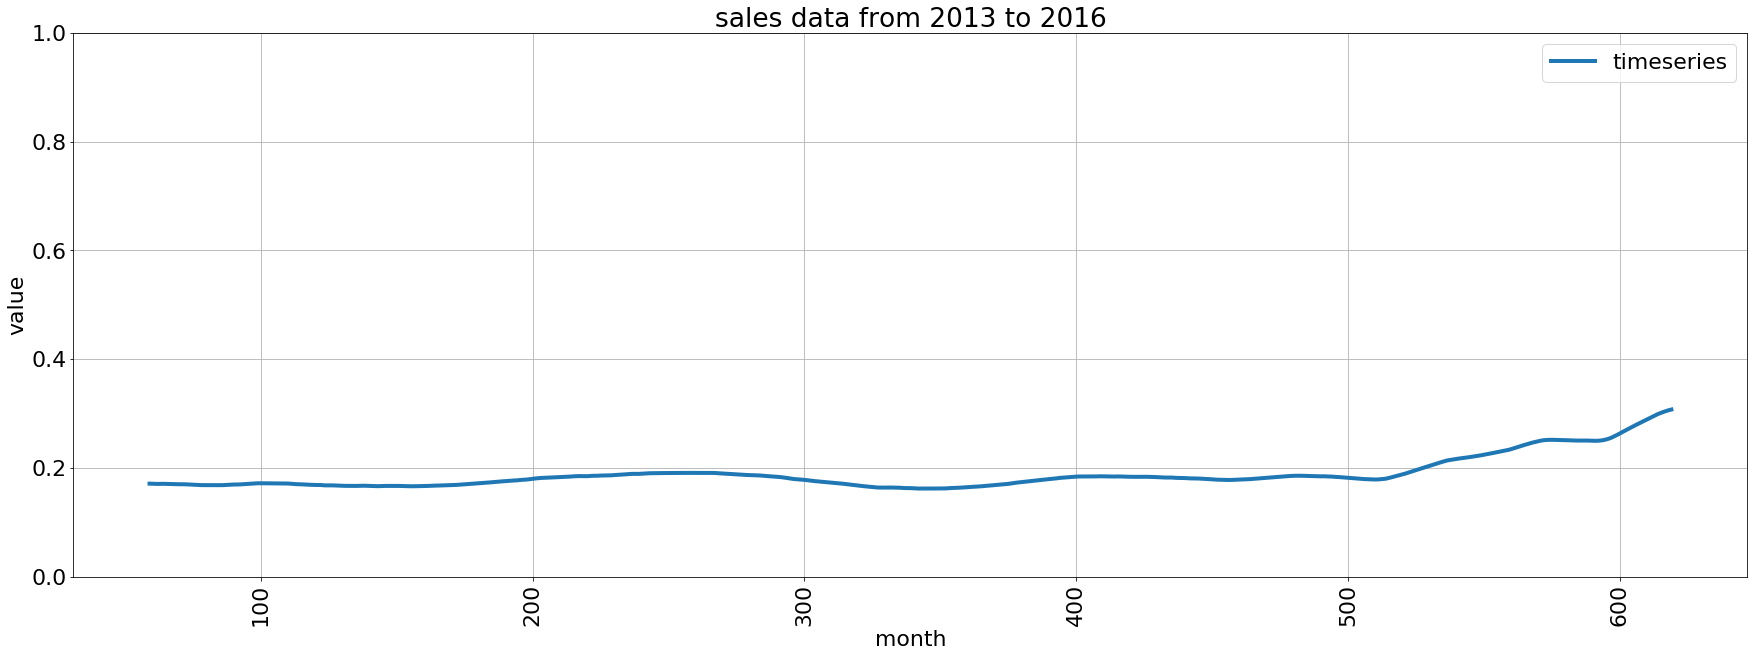

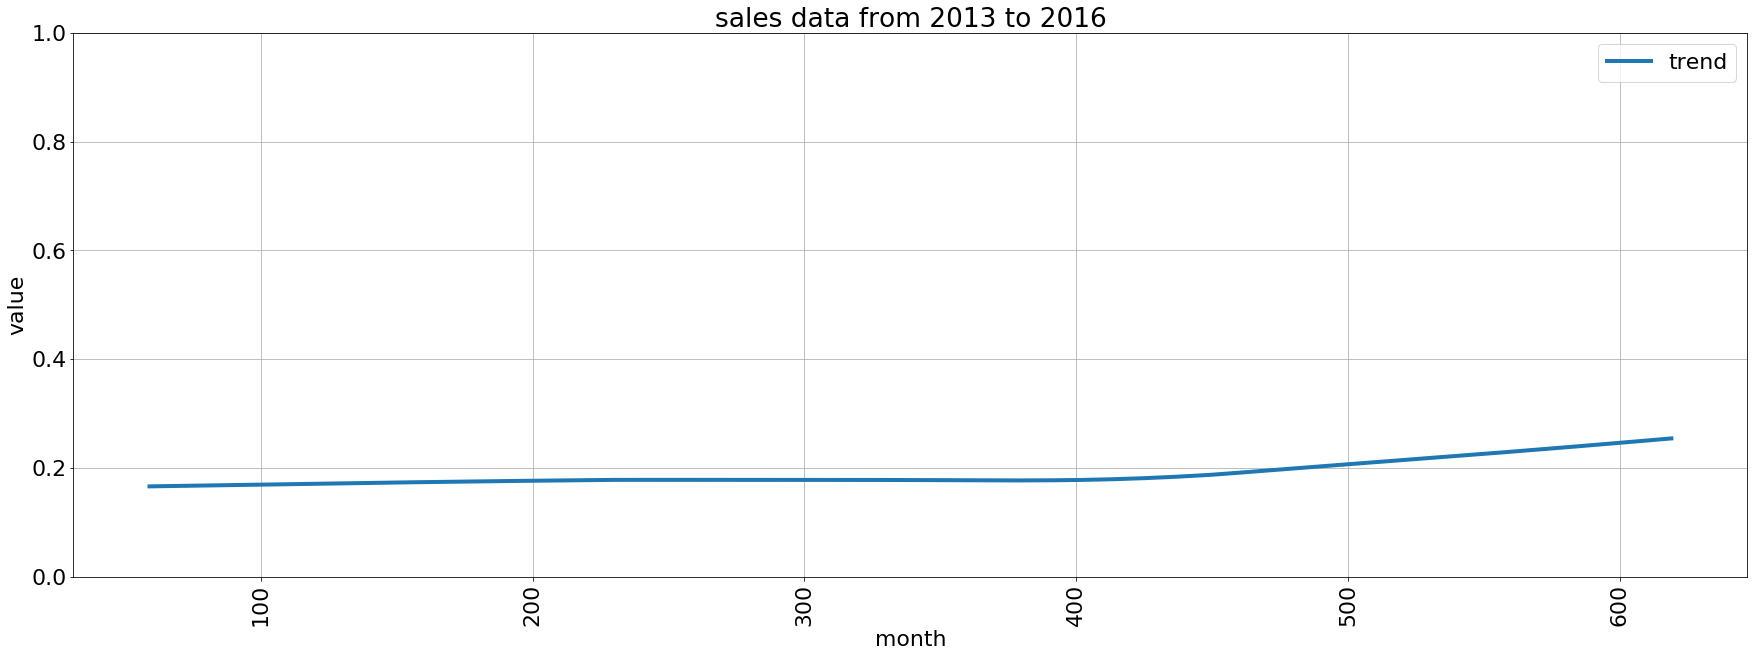

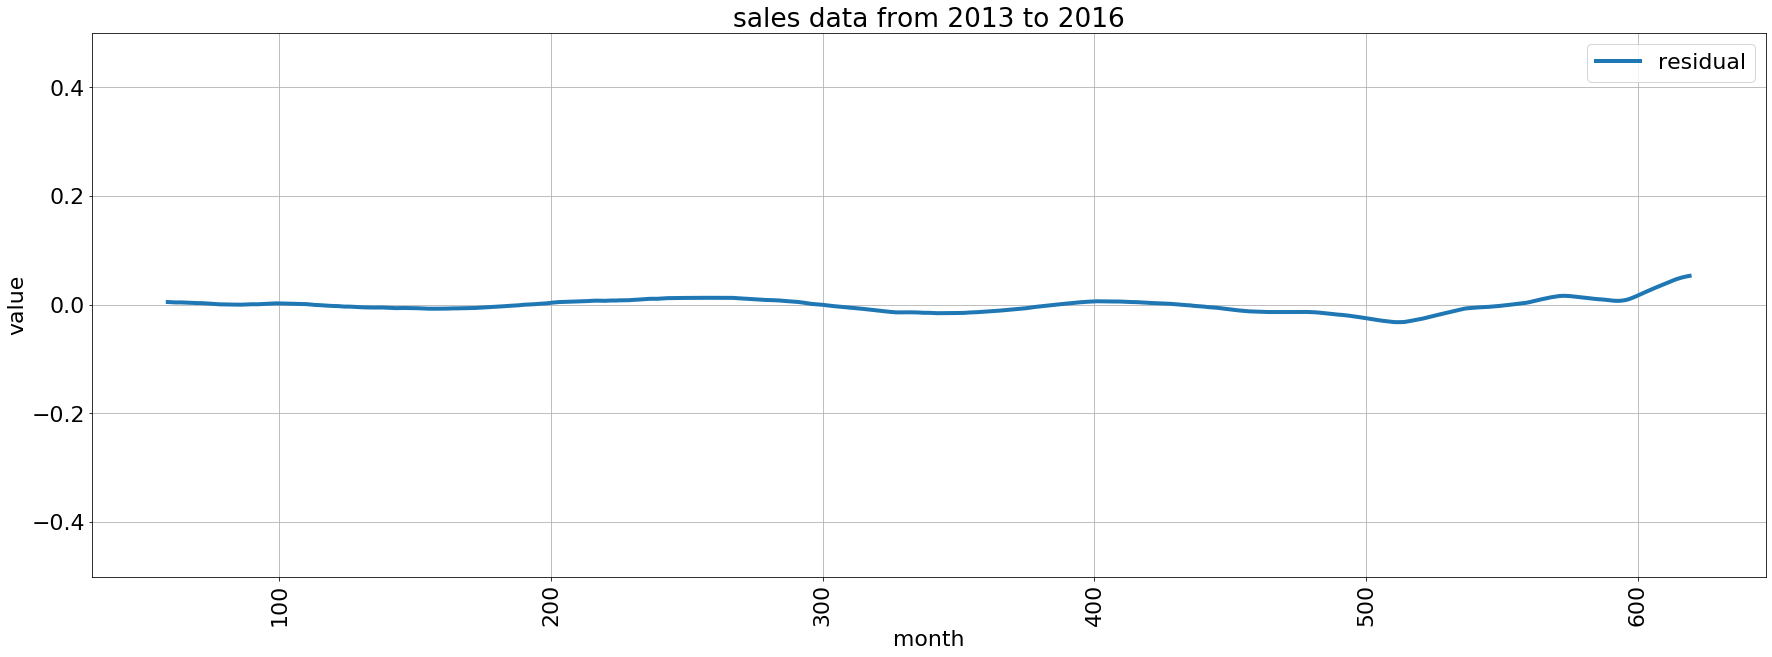

In [33]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.observed, marker='', linestyle='-', label='timeseries', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.trend, marker='', linestyle='-', label='trend', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.resid, marker='', linestyle='-', label='residual', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-0.5,0.5)
plt.show()

In [34]:
def classifier(HR, BP, i):
    HR_decomp = decompose(HR[:i+1].flatten(), 1)
    BP_decomp = decompose(BP[:i+1].flatten(), 1)
    HR_anomaly_score = np.mean(HR_decomp.resid[-32:])
    BP_anomaly_score = np.mean(BP_decomp.resid[-32:])
    if HR_anomaly_score > 0.05 or BP_anomaly_score > 0.05:
        return 'r'
    else:
        return 'g'
        


def plot_classified_timeseries_without_labels(BP_sample, HR_sample, classifier):
    BP = sample_timeseries(BP_sample)
    HR = sample_timeseries(HR_sample)
    t = 0
    BP_last_elem = None
    plt.figure(figsize=(12,8))
    for HRv, BPv, i in zip(HR, BP, range(len(BP))):
        if BP_last_elem == None:
            c = classifier(BP, HR, i)
            plt.plot(range(t, t + len(HRv)), HRv, color=f'{c}', linestyle='-')
            plt.plot(range(t, t + len(BPv)), BPv, color=f'{c}', linestyle='-')
            t += len(BPv)
        else:
            time_range = range(t-1, t + len(BPv)) 
            BPv = np.concatenate(([BP_last_elem], BPv))
            HRv = np.concatenate(([HR_last_elem], HRv))
            c = classifier(HRv, BPv)
            plt.plot(time_range, HRv, color=f'{c}', linestyle='-')
            plt.plot(time_range, BPv, color=f'{c}', linestyle='-')
            t += len(BPv) - 1
        BP_last_elem = BPv[-1]
        HR_last_elem = HRv[-1] 


    plt.title(labels[ind])
    plt.ylim((0,1))

In [ ]:
plot_classified_timeseries_without_labels()

In [8]:
aa = np.array([[1,2],[3,4],[5,6]])

In [9]:
aa.shape

(3, 2)

In [12]:
aa[:2].flatten()

array([1, 2, 3, 4])